In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

# Problem 1: Clustering

## A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

In [4]:
df1 = pd.read_csv("bank_marketing_part1_Data.csv");

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [5]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [6]:
df1.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


Data looks good based on intial records seen in top 5 and bottom 5.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
df1.shape

(210, 7)

In [9]:
df1.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

No null values :)

# Univariate analysis

## Checking the Summary Statistic

In [15]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [22]:
dups = df1.duplicated()
print(f"Number of duplicate rows = {dups.sum()}")

Number of duplicate rows = 0


- Based on summary descriptive, the data looks good.
- We see for most of the variable, mean/medium are nearly equal
- Include a 90% to see variations and it looks distributely evenly
- Std Deviation is high for spending variable

## EDA 
### Univariate

In [17]:
#Spendings

print('Range of values: ', df1['spending'].max()-df1['spending'].min())

Range of values:  10.59


In [19]:
print('Minimum spending: ', df1['spending'].min())
print('Maximum spending: ',df1['spending'].max())
print('Mean value: ', df1['spending'].mean())
print('Median value: ',df1['spending'].median())
print('Standard deviation: ', df1['spending'].std())
print('Null values: ',df1['spending'].isnull().any())

Minimum spending:  10.59
Maximum spending:  21.18
Mean value:  14.847523809523818
Median value:  14.355
Standard deviation:  2.909699430687361
Null values:  False


In [20]:
Q1=df1['spending'].quantile(q=0.25)
Q3=df1['spending'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of spending is ', stats.iqr(df1['spending']))

spending - 1st Quartile (Q1) is:  12.27
spending - 3st Quartile (Q3) is:  17.305
Interquartile range (IQR) of spending is  5.035


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


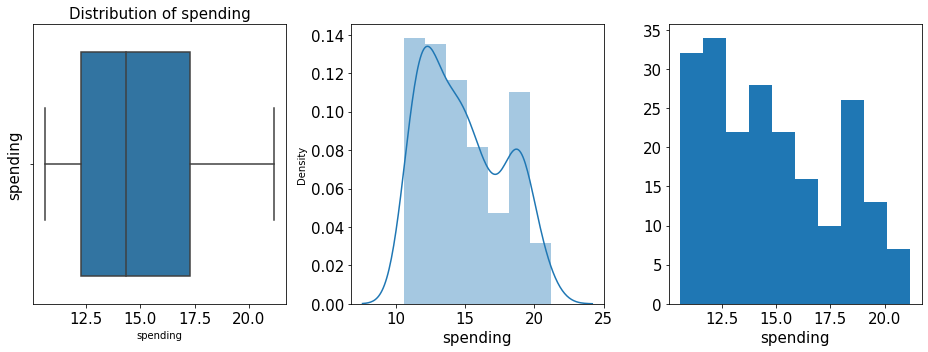

In [23]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='spending',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('spending', fontsize=15)
ax1.set_title('Distribution of spending', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['spending'],ax=ax2)
ax2.set_xlabel('spending', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['spending'])
ax3.set_xlabel('spending', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


In [26]:
#advance_payments variable

print('Range of values: ', df1['advance_payments'].max()-df1['advance_payments'].min())

Range of values:  4.84


In [27]:
print('Minimum advance_payments: ', df1['advance_payments'].min())
print('Maximum advance_payments: ',df1['advance_payments'].max())
print('Mean value: ', df1['advance_payments'].mean())
print('Median value: ',df1['advance_payments'].median())
print('Standard deviation: ', df1['advance_payments'].std())
print('Null values: ',df1['advance_payments'].isnull().any())

Minimum advance_payments:  12.41
Maximum advance_payments:  17.25
Mean value:  14.559285714285727
Median value:  14.32
Standard deviation:  1.305958726564022
Null values:  False


In [28]:
Q1=df1['advance_payments'].quantile(q=0.25)
Q3=df1['advance_payments'].quantile(q=0.75)
print('advance_payments - 1st Quartile (Q1) is: ', Q1)
print('advance_payments - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of advance_payments is ', stats.iqr(df1['advance_payments']))

advance_payments - 1st Quartile (Q1) is:  13.45
advance_payments - 3st Quartile (Q3) is:  15.715
Interquartile range (IQR) of advance_payments is  2.2650000000000006


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


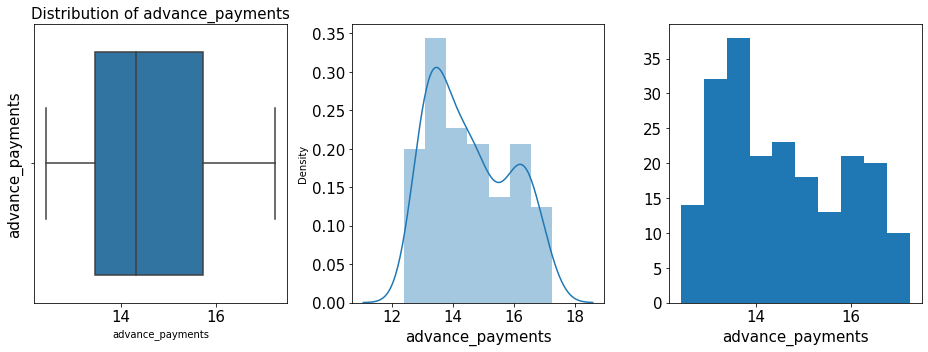

In [29]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='advance_payments',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('advance_payments', fontsize=15)
ax1.set_title('Distribution of advance_payments', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['advance_payments'],ax=ax2)
ax2.set_xlabel('advance_payments', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['advance_payments'])
ax3.set_xlabel('advance_payments', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [30]:
#probability_of_full_payment 

print('Range of values: ', df1['probability_of_full_payment'].max()-df1['probability_of_full_payment'].min())

Range of values:  0.11019999999999996


In [31]:
print('Minimum probability_of_full_payment ', df1['probability_of_full_payment'].min())
print('Maximum probability_of_full_payment: ',df1['probability_of_full_payment'].max())
print('Mean value: ', df1['probability_of_full_payment'].mean())
print('Median value: ',df1['probability_of_full_payment'].median())
print('Standard deviation: ', df1['probability_of_full_payment'].std())
print('Null values: ',df1['probability_of_full_payment'].isnull().any())

Minimum probability_of_full_payment  0.8081
Maximum probability_of_full_payment:  0.9183
Mean value:  0.8709985714285714
Median value:  0.8734500000000001
Standard deviation:  0.0236294165838465
Null values:  False


In [32]:
Q1=df1['probability_of_full_payment'].quantile(q=0.25)
Q3=df1['probability_of_full_payment'].quantile(q=0.75)
print('probability_of_full_payment - 1st Quartile (Q1) is: ', Q1)
print('probability_of_full_payment - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of probability_of_full_payment is ', stats.iqr(df1['probability_of_full_payment']))

probability_of_full_payment - 1st Quartile (Q1) is:  0.8569
probability_of_full_payment - 3st Quartile (Q3) is:  0.887775
Interquartile range (IQR) of probability_of_full_payment is  0.030874999999999986


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


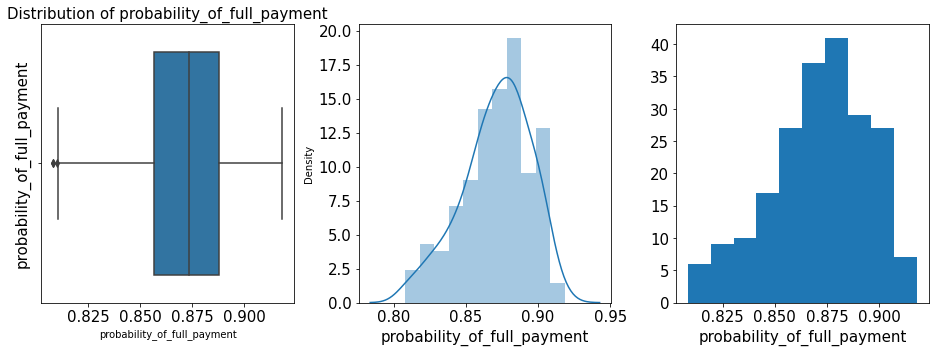

In [33]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='probability_of_full_payment',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('probability_of_full_payment', fontsize=15)
ax1.set_title('Distribution of probability_of_full_payment', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['probability_of_full_payment'],ax=ax2)
ax2.set_xlabel('probability_of_full_payment', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['probability_of_full_payment'])
ax3.set_xlabel('probability_of_full_payment', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [35]:
#current_balance

print('Range of values: ', df1['current_balance'].max()-df1['current_balance'].min())

Range of values:  1.7759999999999998


In [36]:
print('Minimum current_balance: ', df1['current_balance'].min())
print('Maximum current_balance: ',df1['current_balance'].max())
print('Mean value: ', df1['current_balance'].mean())
print('Median value: ',df1['current_balance'].median())
print('Standard deviation: ', df1['current_balance'].std())
print('Null values: ',df1['current_balance'].isnull().any())

Minimum current_balance:  4.899
Maximum current_balance:  6.675
Mean value:  5.628533333333335
Median value:  5.5235
Standard deviation:  0.44306347772644944
Null values:  False


In [37]:
Q1=df1['current_balance'].quantile(q=0.25)
Q3=df1['current_balance'].quantile(q=0.75)
print('current_balance - 1st Quartile (Q1) is: ', Q1)
print('current_balance - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of current_balance is ', stats.iqr(df1['current_balance']))

current_balance - 1st Quartile (Q1) is:  5.26225
current_balance - 3st Quartile (Q3) is:  5.97975
Interquartile range (IQR) of current_balance is  0.7175000000000002


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


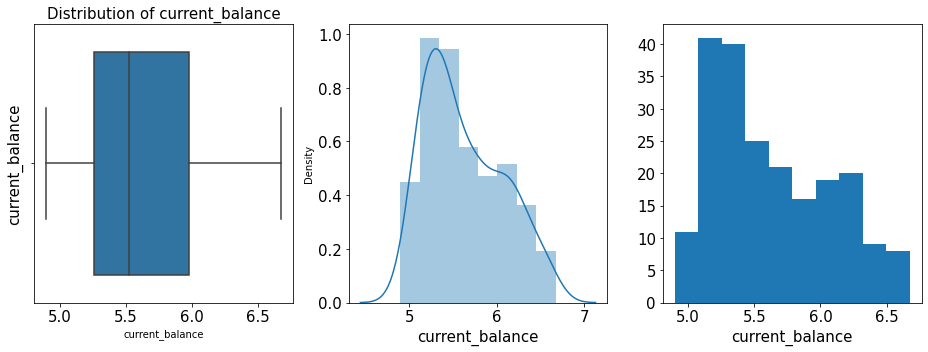

In [38]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='current_balance',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('current_balance', fontsize=15)
ax1.set_title('Distribution of current_balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['current_balance'],ax=ax2)
ax2.set_xlabel('current_balance', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['current_balance'])
ax3.set_xlabel('current_balance', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [39]:
#credit_limit

print('Range of values: ', df1['credit_limit'].max()-df1['credit_limit'].min())

Range of values:  1.4030000000000005


In [40]:
print('Minimum credit_limit: ', df1['credit_limit'].min())
print('Maximum credit_limit: ',df1['credit_limit'].max())
print('Mean value: ', df1['credit_limit'].mean())
print('Median value: ',df1['credit_limit'].median())
print('Standard deviation: ', df1['credit_limit'].std())
print('Null values: ',df1['credit_limit'].isnull().any())

Minimum credit_limit:  2.63
Maximum credit_limit:  4.033
Mean value:  3.258604761904763
Median value:  3.237
Standard deviation:  0.37771444490658734
Null values:  False


In [41]:
Q1=df1['credit_limit'].quantile(q=0.25)
Q3=df1['credit_limit'].quantile(q=0.75)
print('credit_limit - 1st Quartile (Q1) is: ', Q1)
print('credit_limit - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of credit_limit is ', stats.iqr(df1['credit_limit']))

credit_limit - 1st Quartile (Q1) is:  2.944
credit_limit - 3st Quartile (Q3) is:  3.56175
Interquartile range (IQR) of credit_limit is  0.61775


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


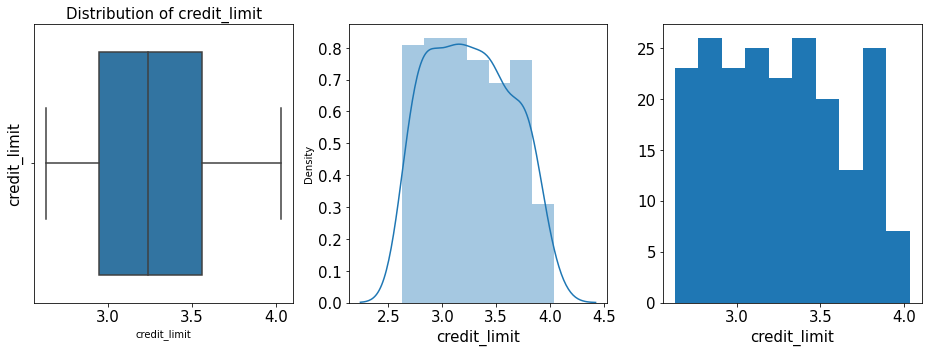

In [42]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='credit_limit',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('credit_limit', fontsize=15)
ax1.set_title('Distribution of credit_limit', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['credit_limit'],ax=ax2)
ax2.set_xlabel('credit_limit', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['credit_limit'])
ax3.set_xlabel('credit_limit', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [44]:
#min_payment_amt

print('Range of values: ', df1['min_payment_amt'].max()-df1['min_payment_amt'].min())

Range of values:  7.690899999999999


In [45]:
print('Minimum min_payment_amt: ', df1['min_payment_amt'].min())
print('Maximum min_payment_amt: ',df1['min_payment_amt'].max())
print('Mean value: ', df1['min_payment_amt'].mean())
print('Median value: ',df1['min_payment_amt'].median())
print('Standard deviation: ', df1['min_payment_amt'].std())
print('Null values: ',df1['min_payment_amt'].isnull().any())

Minimum min_payment_amt:  0.7651
Maximum min_payment_amt:  8.456
Mean value:  3.7002009523809503
Median value:  3.599
Standard deviation:  1.5035571308217792
Null values:  False


In [46]:
Q1=df1['min_payment_amt'].quantile(q=0.25)
Q3=df1['min_payment_amt'].quantile(q=0.75)
print('min_payment_amt - 1st Quartile (Q1) is: ', Q1)
print('min_payment_amt - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of min_payment_amt is ', stats.iqr(df1['min_payment_amt']))

min_payment_amt - 1st Quartile (Q1) is:  2.5615
min_payment_amt - 3st Quartile (Q3) is:  4.76875
Interquartile range (IQR) of min_payment_amt is  2.2072499999999997


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


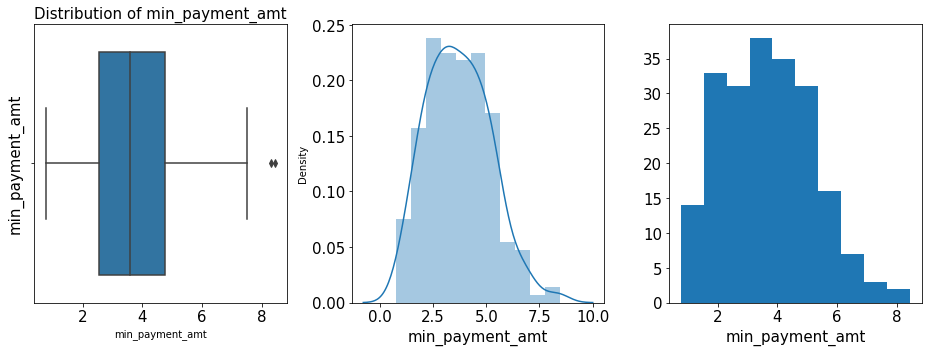

In [47]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='min_payment_amt',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('min_payment_amt', fontsize=15)
ax1.set_title('Distribution of min_payment_amt', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['min_payment_amt'],ax=ax2)
ax2.set_xlabel('min_payment_amt', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['min_payment_amt'])
ax3.set_xlabel('min_payment_amt', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [48]:
#max_spent_in_single_shopping

print('Range of values: ', df1['max_spent_in_single_shopping'].max()-df1['max_spent_in_single_shopping'].min())

Range of values:  2.0309999999999997


In [49]:
print('Minimum max_spent_in_single_shopping: ', df1['max_spent_in_single_shopping'].min())
print('Maximum max_spent_in_single_shoppings: ',df1['max_spent_in_single_shopping'].max())
print('Mean value: ', df1['max_spent_in_single_shopping'].mean())
print('Median value: ',df1['max_spent_in_single_shopping'].median())
print('Standard deviation: ', df1['max_spent_in_single_shopping'].std())
print('Null values: ',df1['max_spent_in_single_shopping'].isnull().any())

Minimum max_spent_in_single_shopping:  4.519
Maximum max_spent_in_single_shoppings:  6.55
Mean value:  5.408071428571429
Median value:  5.223000000000001
Standard deviation:  0.49148049910240543
Null values:  False


In [50]:
Q1=df1['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df1['max_spent_in_single_shopping'].quantile(q=0.75)
print('max_spent_in_single_shopping - 1st Quartile (Q1) is: ', Q1)
print('max_spent_in_single_shopping - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of max_spent_in_single_shopping is ', stats.iqr(df1['max_spent_in_single_shopping']))

max_spent_in_single_shopping - 1st Quartile (Q1) is:  5.045
max_spent_in_single_shopping - 3st Quartile (Q3) is:  5.877
Interquartile range (IQR) of max_spent_in_single_shopping is  0.8319999999999999


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


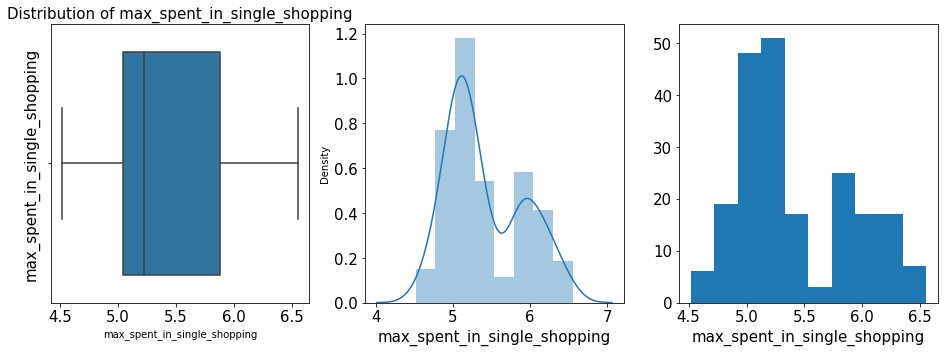

In [64]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='max_spent_in_single_shopping',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('max_spent_in_single_shopping', fontsize=15)
ax1.set_title('Distribution of max_spent_in_single_shopping', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['max_spent_in_single_shopping'],ax=ax2)
ax2.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['max_spent_in_single_shopping'])
ax3.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [62]:
#  skewness values quantitatively
df1.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

### Multivariate Analysis

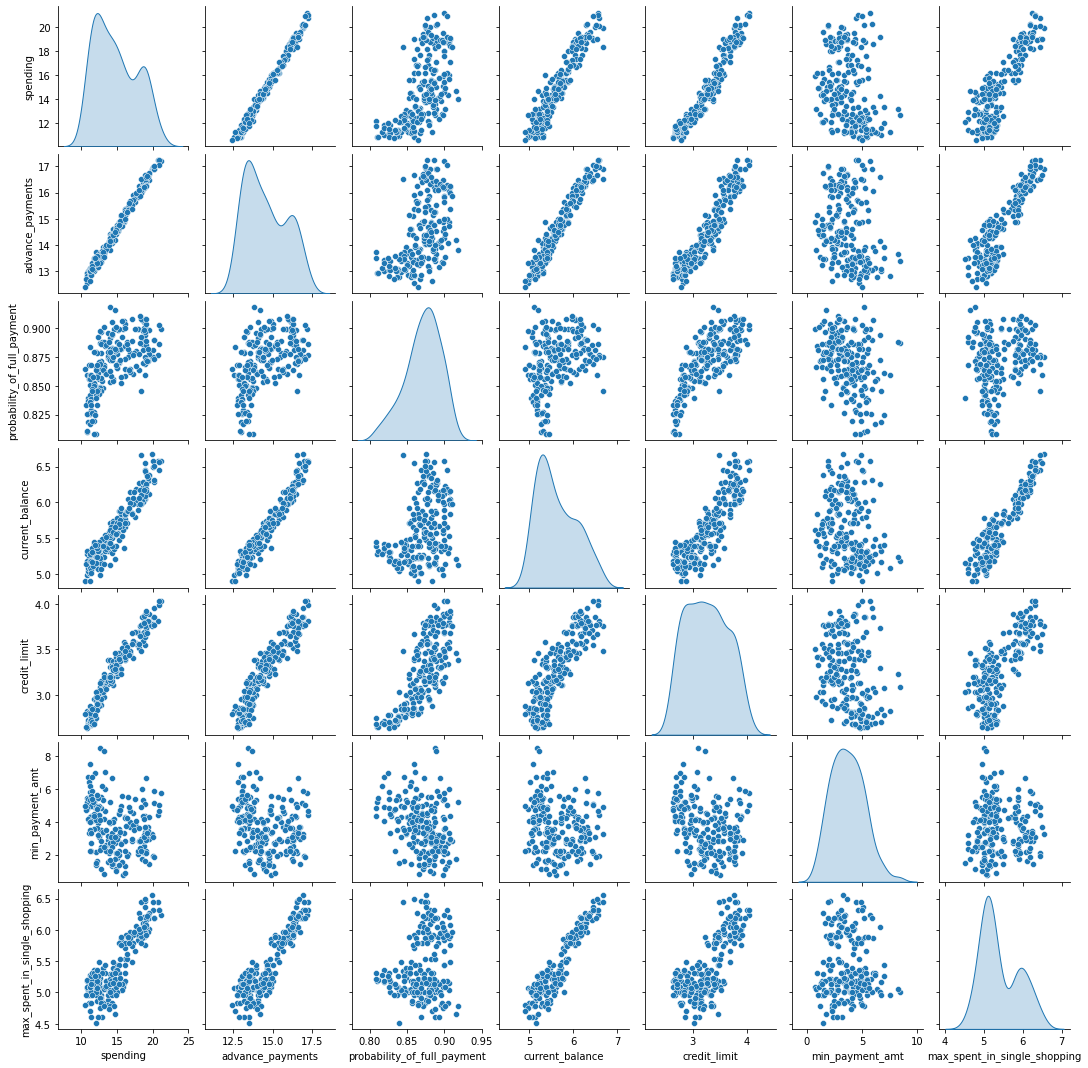

In [84]:
q = sns.pairplot(df1,diag_kind='kde');
q.fig.set_size_inches(15,15)

In [68]:
#correlation matrix

df1.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


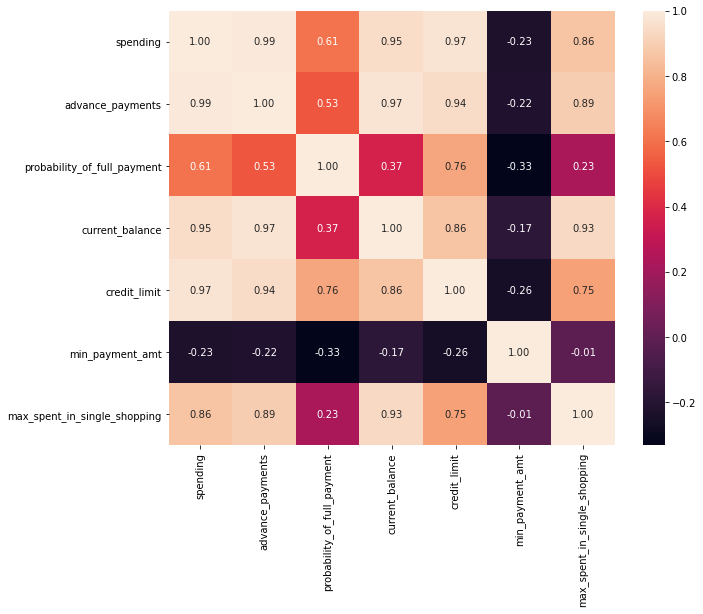

In [72]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,fmt=".2f")
plt.show()

- Strong positive correlation between 
        - spending & advance_payments, 
        - advance_payments & current_balance, 
        - credit_limit & spending
        - spending & current_balance
        - credit_limit & advance_payments
        - max_spent_in_single_shopping  current_balance

#### Checking for Outliers

In [73]:
clean_df1=df1.copy()

In [75]:
def check_outliers(dataset):
    vData_num = dataset.loc[:,dataset.columns != 'class']
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    # checking for outliers, True represents outlier
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
    
check_outliers(df1)

No. of outliers in probability_of_full_payment: 3
No. of outliers in min_payment_amt: 2


No of attributes with outliers are : 2


In [76]:
check_outliers(clean_df1)

No. of outliers in probability_of_full_payment: 3
No. of outliers in min_payment_amt: 2


No of attributes with outliers are : 2


In [81]:
# Replace elements of columns that fall below Q1-1.5*IQR and above Q3+1.5*IQR
#clean_df1[spending].replace(clean_df1.loc[(clean_df1[spending] > Q3+1.5*IQR)|(clean_df1[spending] < Q1-1.5*IQR), spending], clean_df1[spending].median())

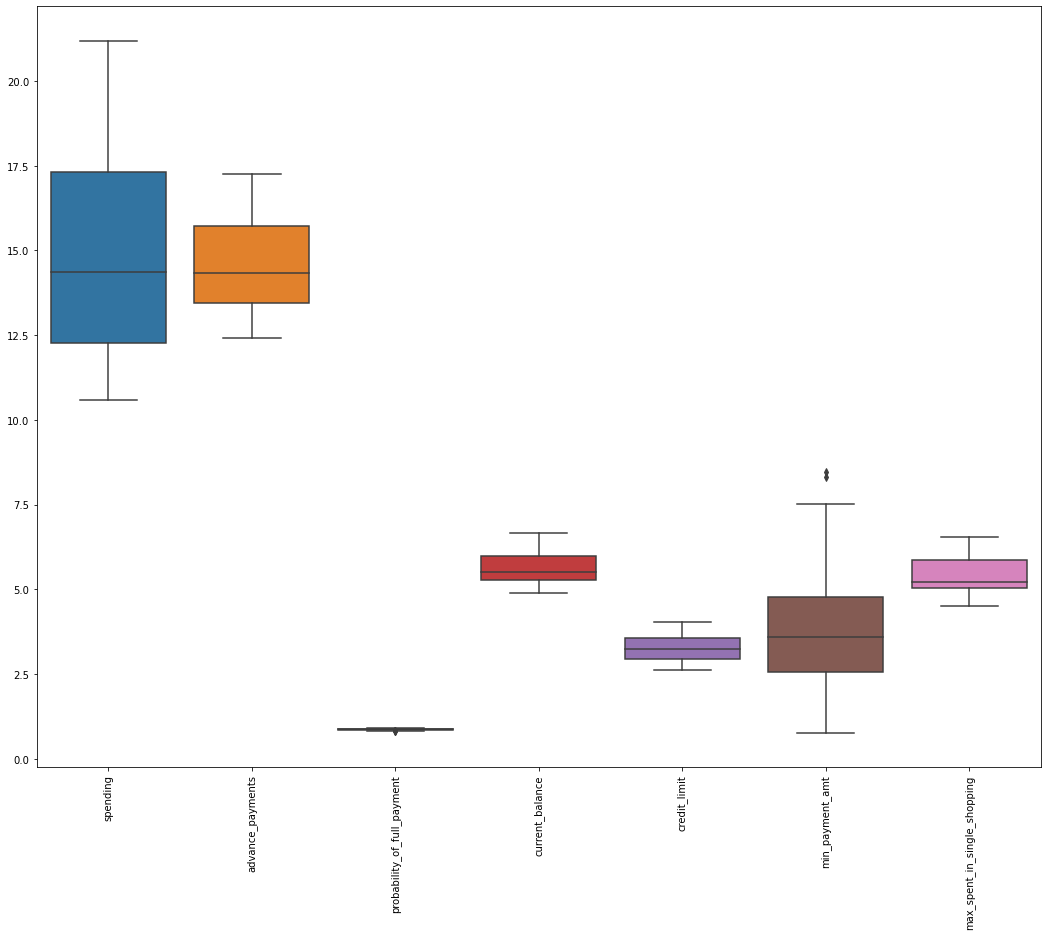

In [78]:
#checking presence of outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data=clean_df1)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

Observation: 
Most of the outlier has been treated and now we are good to go.Though we did treated the outlier, we still see one as per the boxplot, it is okay, as it is no extrme and on lower band.

# 1.2

## Do you think scaling is necessary for clustering in this case? Justify

Scaling needs to be done as the values of the variables are different.
spending, advance_payments are in different values and this may get more weightage.
Also have shown below the plot of the data prior and after scaling.
Scaling will have all the values in the relative same range.
I have used zscore to standarised the data to relative same scale -3 to +3.

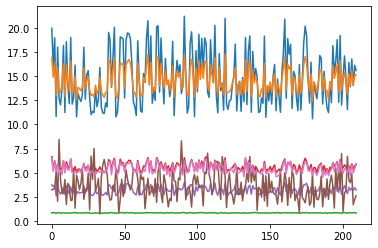

In [86]:
# before scaling 
plt.plot(clean_df1)
plt.show()

In [352]:
# Scaling the data

from scipy.stats import zscore
scaled_df1=df1.apply(zscore)
scaled_df1.head()

#StandardScalar can also be used would give the same output more or less.

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


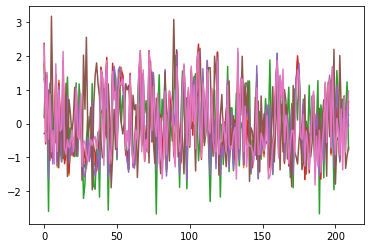

In [89]:
#after scaling
plt.plot(scaled_df1)
plt.show()

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

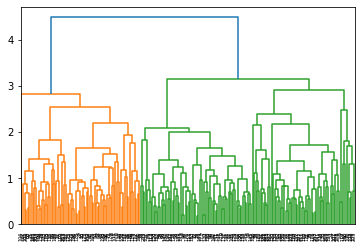

In [91]:
link_method = linkage(scaled_df1, method = 'average')
dend = dendrogram(link_method)

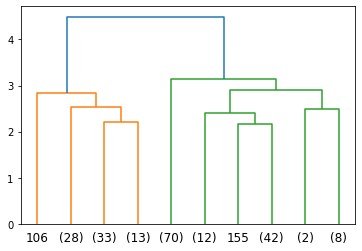

In [108]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)
#Cutting the Dendrogram with suitable clusters

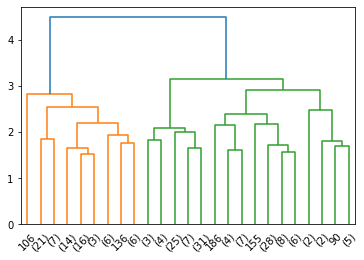

In [107]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 25)

In [94]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters_3 = fcluster(link_method, 3, criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [95]:
cluster3_df1=df1.copy()

In [101]:
cluster3_df1['clusters-3'] = clusters_3

In [102]:
cluster3_df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [103]:
#Cluster Frequency
cluster3_df1['clusters-3'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters-3, dtype: int64

In [104]:
aggdata=cluster3_df1.groupby('clusters-3').mean()
aggdata['Freq']=cluster3_df1['clusters-3'].value_counts().sort_index()
aggdata 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [110]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df1)
k_means.inertia_

1469.9999999999995

In [111]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df1)
k_means.inertia_

659.1717544870411

In [133]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df1)
k_means.inertia_
k_means.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [113]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df1)
k_means.inertia_

371.301721277542

In [115]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df1)
k_means.inertia_

326.4763361202825

In [116]:
wss = [];

In [118]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df1)
    wss.append(KM.inertia_)
    
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 326.93482873449955,
 289.3608470485395,
 263.2599534317033,
 242.99183676867236,
 220.90976765226458,
 207.79851639889688]

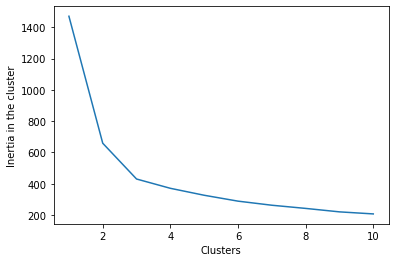

In [119]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [134]:
k_means_3 = KMeans(n_clusters = 3)
k_means_3.fit(scaled_df1)
labels_3 = k_means_3.labels_

In [137]:
silhouette_score(scaled_df1,labels_3)

0.40072705527512986

In [128]:
from sklearn import metrics

In [138]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(scaled_df1)
    scores.append(metrics.silhouette_score(scaled_df1, km.labels_))
    
scores

[0.46577247686580914,
 0.40072705527512986,
 0.3291966792017613,
 0.28316654897654814,
 0.2897583830272519,
 0.2694844355168536,
 0.2543731602750563,
 0.2623959398663564,
 0.2673980772529918]

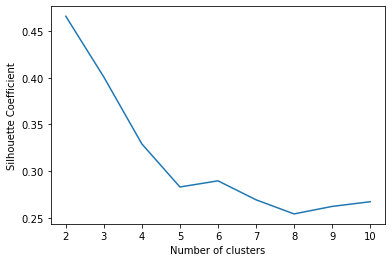

In [130]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


In [147]:
kmeans3_df1=df1.copy()
kmeans3_df1["Clus_kmeans"] = labels_3
kmeans3_df1.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0


In [150]:
sil_width = silhouette_samples(scaled_df1,labels_3)

In [153]:
kmeans3_df1["sil_width"] = sil_width
kmeans3_df1.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0,0.362276


In [156]:
#fitting the Kmeans
km_3 = KMeans(n_clusters=3)

In [158]:
km_3.fit(scaled_df1)
km_3.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [159]:
#cluster Profiling
pd.Series(km_3.labels_).value_counts()

0    72
2    71
1    67
dtype: int64

In [164]:
kmeans_df1=df1.copy()

In [168]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_df1)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans_df1['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans_df1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,14.4,14.3,0.9,5.5,3.3,2.7,5.1


In [170]:
#transposing the cluster via Kmeans
cluster_3_T = kmeans_mean_cluster.T
cluster_3_T

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1


In [173]:
##transposing the cluster via Kmeans
aggdata.T

clusters-3,1,2,3
spending,18.129200,11.916857,14.217077
advance_payments,16.058000,13.291000,14.195846
probability_of_full_payment,0.881595,0.846766,0.884869
current_balance,6.135747,5.258300,5.442000
credit_limit,3.648120,2.846000,3.253508
min_payment_amt,3.650200,4.619000,2.768418
max_spent_in_single_shopping,5.987040,5.115071,5.055569
Freq,75.000000,70.000000,65.000000


# Problem 2:  CART-RF-ANN

## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [174]:
df2 = pd.read_csv("insurance_part2_data.csv")

# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [175]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [176]:
df2.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [177]:
df2.shape

(3000, 10)

In [178]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [181]:
df2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

## Checking for Summary Statistics

In [188]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [190]:
df2.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,53.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,48.300,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,224.200,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,172.025,539.00


In [191]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
dups = df2.duplicated()
print(f"Number of duplicate rows = {dups.sum()}")

Number of duplicate rows = 139


In [193]:
#Getting unique counts of all Nominal Variables
for column in df2[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df2[column].nunique())
    print(df2[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




# EDA

## Univariate

In [195]:
#Age

print('Range of values: ', df2['Age'].max()-df2['Age'].min())

Range of values:  76


In [196]:
#Central values 
print('Minimum Age: ', df2['Age'].min())
print('Maximum Age: ',df2['Age'].max())
print('Mean value: ', df2['Age'].mean())
print('Median value: ',df2['Age'].median())
print('Standard deviation: ', df2['Age'].std())
print('Null values: ',df2['Age'].isnull().any())

Minimum Age:  8
Maximum Age:  84
Mean value:  38.091
Median value:  36.0
Standard deviation:  10.463518245377944
Null values:  False


In [197]:
#Quartiles

Q1=df2['Age'].quantile(q=0.25)
Q3=df2['Age'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Age is ', stats.iqr(df2['Age']))

spending - 1st Quartile (Q1) is:  32.0
spending - 3st Quartile (Q3) is:  42.0
Interquartile range (IQR) of Age is  10.0


In [198]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Age: ', L_outliers)
print('Upper outliers in Age: ', U_outliers)

Lower outliers in Age:  17.0
Upper outliers in Age:  57.0


In [199]:
print('Number of outliers in Age upper : ', df2[df2['Age']>57.0]['Age'].count())
print('Number of outliers in Age lower : ', df2[df2['Age']<17.0]['Age'].count())
print('% of Outlier in Age upper: ',round(df2[df2['Age']>57.0]['Age'].count()*100/len(df2)), '%')
print('% of Outlier in Age lower: ',round(df2[df2['Age']<17.0]['Age'].count()*100/len(df2)), '%')

Number of outliers in Age upper :  198
Number of outliers in Age lower :  6
% of Outlier in Age upper:  7 %
% of Outlier in Age lower:  0 %


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


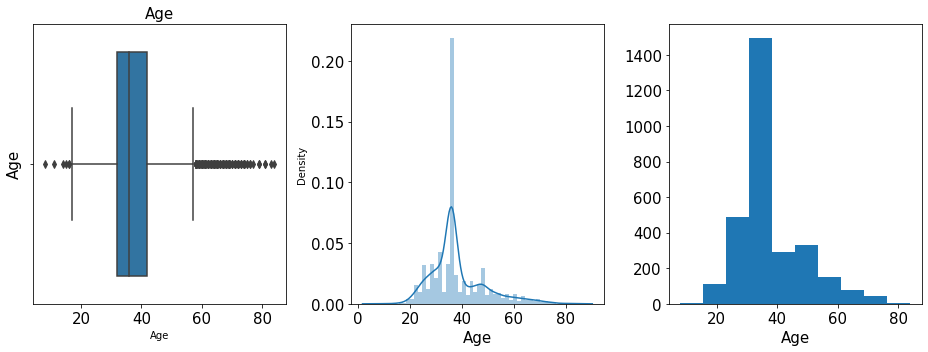

In [203]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Age',data=df2,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df2['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df2['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


In [204]:
#commission

print('Range of values: ', df2['Commision'].max()-df2['Commision'].min())

Range of values:  210.21


In [206]:
#Central values 
print('Minimum Commision: ', df2['Commision'].min())
print('Maximum Commision: ',df2['Commision'].max())
print('Mean value: ', df2['Commision'].mean())
print('Median value: ',df2['Commision'].median())
print('Standard deviation: ', df2['Commision'].std())
print('Null values: ',df2['Commision'].isnull().any())

Minimum Commision:  0.0
Maximum Commision:  210.21
Mean value:  14.529203333333266
Median value:  4.63
Standard deviation:  25.48145450662553
Null values:  False


In [207]:
#Quartiles

Q1=df2['Commision'].quantile(q=0.25)
Q3=df2['Commision'].quantile(q=0.75)
print('Commision - 1st Quartile (Q1) is: ', Q1)
print('Commision - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Commision is ', stats.iqr(df2['Commision']))

Commision - 1st Quartile (Q1) is:  0.0
Commision - 3st Quartile (Q3) is:  17.235
Interquartile range (IQR) of Commision is  17.235


In [208]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Commision: ', L_outliers)
print('Upper outliers in Commision: ', U_outliers)

Lower outliers in Commision:  -25.8525
Upper outliers in Commision:  43.0875


In [210]:
print('Number of outliers in Commision upper : ', df2[df2['Commision']>43.0875]['Commision'].count())
print('Number of outliers in Commision lower : ', df2[df2['Commision']<-25.8525]['Commision'].count())
print('% of Outlier in Commision upper: ',round(df2[df2['Commision']>43.0875]['Commision'].count()*100/len(df2)), '%')
print('% of Outlier in Commision lower: ',round(df2[df2['Commision']<-25.8525]['Commision'].count()*100/len(df2)), '%')

Number of outliers in Commision upper :  362
Number of outliers in Commision lower :  0
% of Outlier in Commision upper:  12 %
% of Outlier in Commision lower:  0 %


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


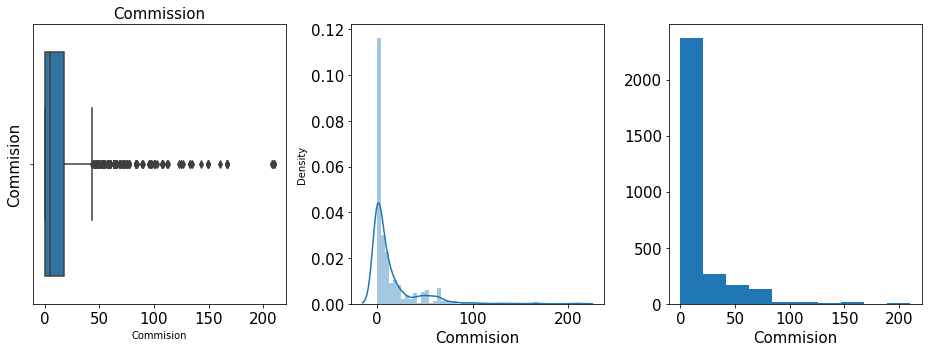

In [211]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Commision',data=df2,orient='v',ax=ax1)
ax1.set_ylabel('Commision', fontsize=15)
ax1.set_title('Commission', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df2['Commision'],ax=ax2)
ax2.set_xlabel('Commision', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df2['Commision'])
ax3.set_xlabel('Commision', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


In [212]:
#duration

print('Range of values: ', df2['Duration'].max()-df2['Duration'].min())

Range of values:  4581


In [213]:
#Central values 
print('Minimum Duration: ', df2['Duration'].min())
print('Maximum Duration: ',df2['Duration'].max())
print('Mean value: ', df2['Duration'].mean())
print('Median value: ',df2['Duration'].median())
print('Standard deviation: ', df2['Duration'].std())
print('Null values: ',df2['Duration'].isnull().any())

Minimum Duration:  -1
Maximum Duration:  4580
Mean value:  70.00133333333333
Median value:  26.5
Standard deviation:  134.05331313253495
Null values:  False


In [215]:
#Quartiles

Q1=df2['Duration'].quantile(q=0.25)
Q3=df2['Duration'].quantile(q=0.75)
print('Duration - 1st Quartile (Q1) is: ', Q1)
print('Duration - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Duration is ', stats.iqr(df2['Duration']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

Duration - 1st Quartile (Q1) is:  11.0
Duration - 3st Quartile (Q3) is:  63.0
Interquartile range (IQR) of Duration is  52.0
Lower outliers in Duration:  -67.0
Upper outliers in Duration:  141.0


In [216]:
print('Number of outliers in Duration upper : ', df2[df2['Duration']>141.0]['Duration'].count())
print('Number of outliers in Duration lower : ', df2[df2['Duration']<-67.0]['Duration'].count())
print('% of Outlier in Duration upper: ',round(df2[df2['Duration']>141.0]['Duration'].count()*100/len(df2)), '%')
print('% of Outlier in Duration lower: ',round(df2[df2['Duration']<-67.0]['Duration'].count()*100/len(df2)), '%')

Number of outliers in Duration upper :  382
Number of outliers in Duration lower :  0
% of Outlier in Duration upper:  13 %
% of Outlier in Duration lower:  0 %


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


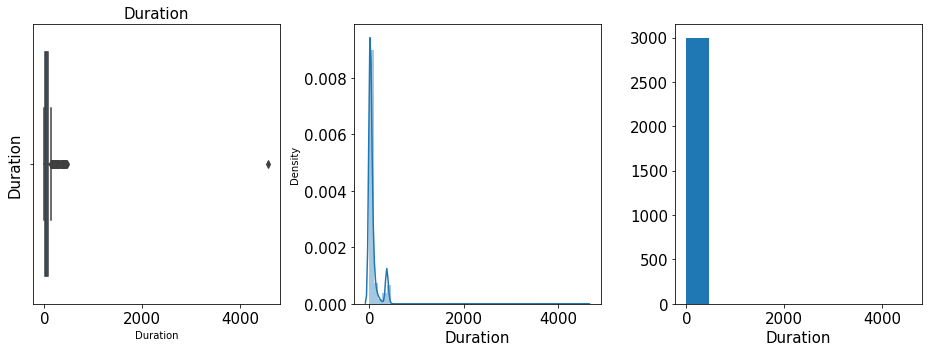

In [217]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Duration',data=df2,orient='v',ax=ax1)
ax1.set_ylabel('Duration', fontsize=15)
ax1.set_title('Duration', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df2['Duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df2['Duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


In [219]:
#Sales

print('Range of values: ', df2['Sales'].max()-df2['Sales'].min())

Range of values:  539.0


In [220]:
#Central values 
print('Minimum Sales: ', df2['Sales'].min())
print('Maximum Sales: ',df2['Sales'].max())
print('Mean value: ', df2['Sales'].mean())
print('Median value: ',df2['Sales'].median())
print('Standard deviation: ', df2['Sales'].std())
print('Null values: ',df2['Sales'].isnull().any())

Minimum Sales:  0.0
Maximum Sales:  539.0
Mean value:  60.24991333333344
Median value:  33.0
Standard deviation:  70.73395353143047
Null values:  False


In [223]:
#Quartiles

Q1=df2['Sales'].quantile(q=0.25)
Q3=df2['Sales'].quantile(q=0.75)
print('Sales - 1st Quartile (Q1) is: ', Q1)
print('Sales - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Sales is ', stats.iqr(df2['Sales']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Sales: ', L_outliers)
print('Upper outliers in Sales: ', U_outliers)

Sales - 1st Quartile (Q1) is:  20.0
Sales - 3st Quartile (Q3) is:  69.0
Interquartile range (IQR) of Sales is  49.0
Lower outliers in Sales:  -53.5
Upper outliers in Sales:  142.5


In [225]:
print('Number of outliers in Sales upper : ', df2[df2['Sales']>142.5]['Sales'].count())
print('Number of outliers in Sales lower : ', df2[df2['Sales']<-53.5]['Sales'].count())
print('% of Outlier in Sales upper: ',round(df2[df2['Sales']>142.5]['Sales'].count()*100/len(df2)), '%')
print('% of Outlier in Sales lower: ',round(df2[df2['Sales']<-53.5]['Sales'].count()*100/len(df2)), '%')

Number of outliers in Sales upper :  353
Number of outliers in Sales lower :  0
% of Outlier in Sales upper:  12 %
% of Outlier in Sales lower:  0 %


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


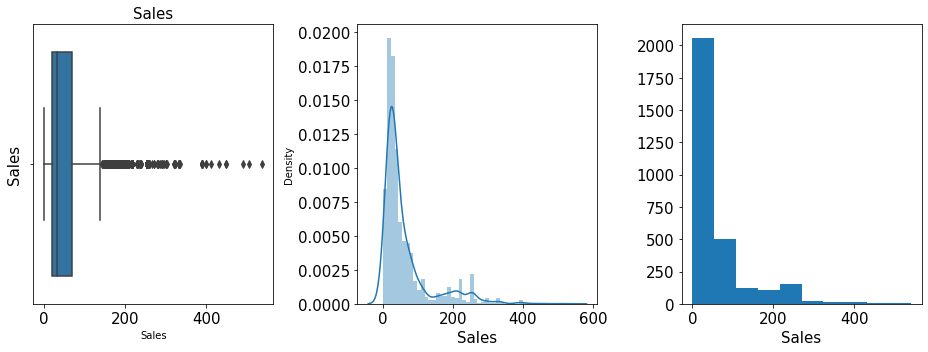

In [226]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Sales',data=df2,orient='v',ax=ax1)
ax1.set_ylabel('Sales', fontsize=15)
ax1.set_title('Sales', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df2['Sales'],ax=ax2)
ax2.set_xlabel('Sales', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df2['Sales'])
ax3.set_xlabel('Sales', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

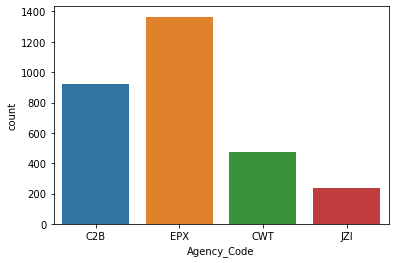

In [229]:
# agency_code

sns.countplot(data = df2, x = 'Agency_Code')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

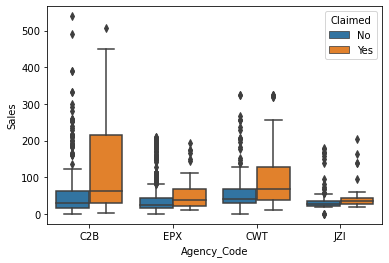

In [230]:
sns.boxplot(data = df2, x='Agency_Code',y='Sales', hue='Claimed')

C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

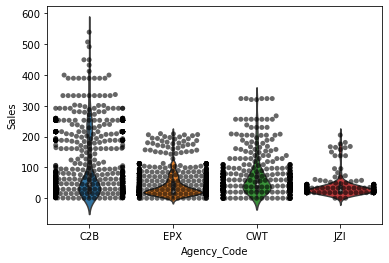

In [231]:
sns.violinplot(data = df2, x='Agency_Code',y='Sales')
sns.swarmplot(data = df2, x='Agency_Code',y='Sales', color = 'k', alpha = 0.6)

<AxesSubplot:xlabel='Type', ylabel='count'>

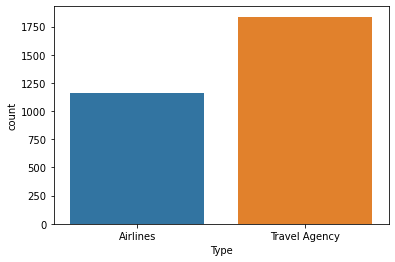

In [233]:
#type

sns.countplot(data = df2, x = 'Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

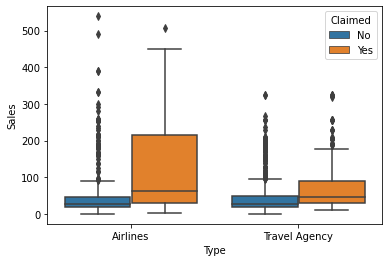

In [234]:
sns.boxplot(data = df2, x='Type',y='Sales', hue='Claimed')

C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Type', ylabel='Sales'>

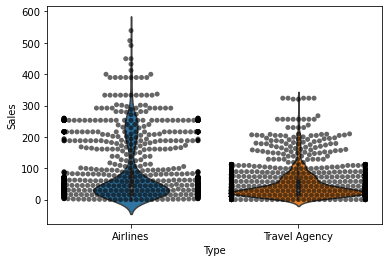

In [235]:
sns.violinplot(data = df2, x='Type',y='Sales')
sns.swarmplot(data = df2, x='Type',y='Sales', color = 'k', alpha = 0.6)

<AxesSubplot:xlabel='Channel', ylabel='count'>

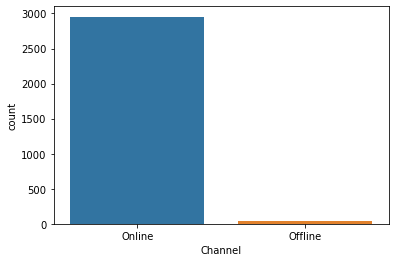

In [237]:
#channel

sns.countplot(data = df2, x = 'Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

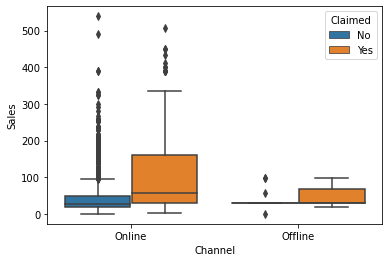

In [238]:
sns.boxplot(data = df2, x='Channel',y='Sales', hue='Claimed')

C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Channel', ylabel='Sales'>

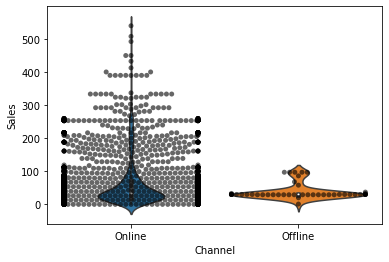

In [239]:
sns.violinplot(data = df2, x='Channel',y='Sales')
sns.swarmplot(data = df2, x='Channel',y='Sales', color = 'k', alpha = 0.6)

<AxesSubplot:xlabel='Product Name', ylabel='count'>

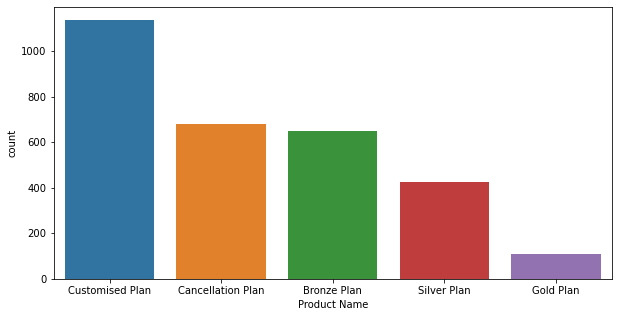

In [243]:
# Product Name
plt.figure(figsize = (10,5))
sns.countplot(data = df2, x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

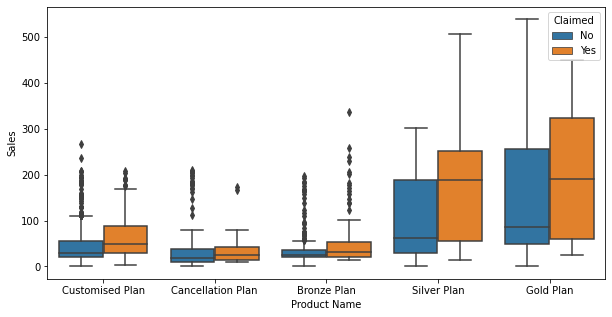

In [245]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df2, x='Product Name',y='Sales', hue='Claimed')

C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

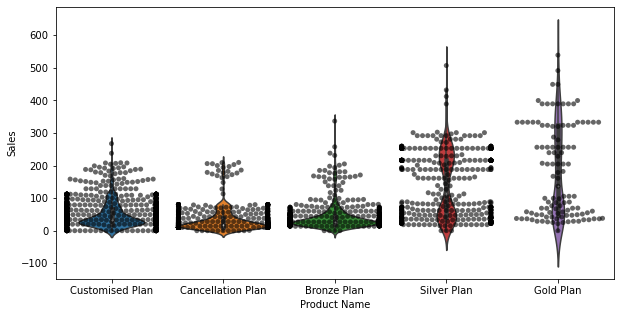

In [246]:
plt.figure(figsize = (10,5))
sns.violinplot(data = df2, x='Product Name',y='Sales')
sns.swarmplot(data = df2, x='Product Name',y='Sales', color = 'k', alpha = 0.6)

<AxesSubplot:xlabel='Destination', ylabel='count'>

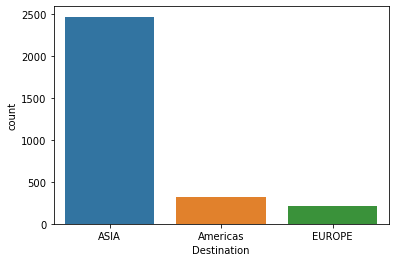

In [247]:
#Destination

sns.countplot(data = df2, x = 'Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

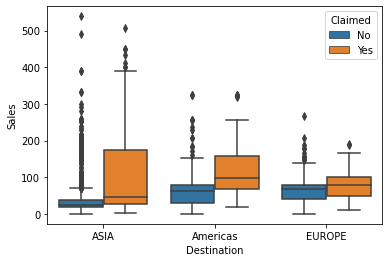

In [248]:
sns.boxplot(data = df2, x='Destination',y='Sales', hue='Claimed')

C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\randy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Destination', ylabel='Sales'>

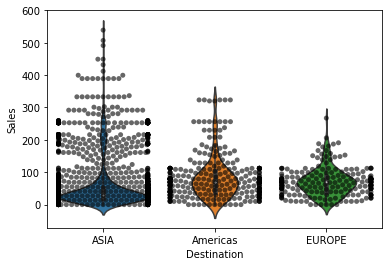

In [249]:
sns.violinplot(data = df2, x='Destination',y='Sales')
sns.swarmplot(data = df2, x='Destination',y='Sales', color = 'k', alpha = 0.6)

## Multivariate Analysis

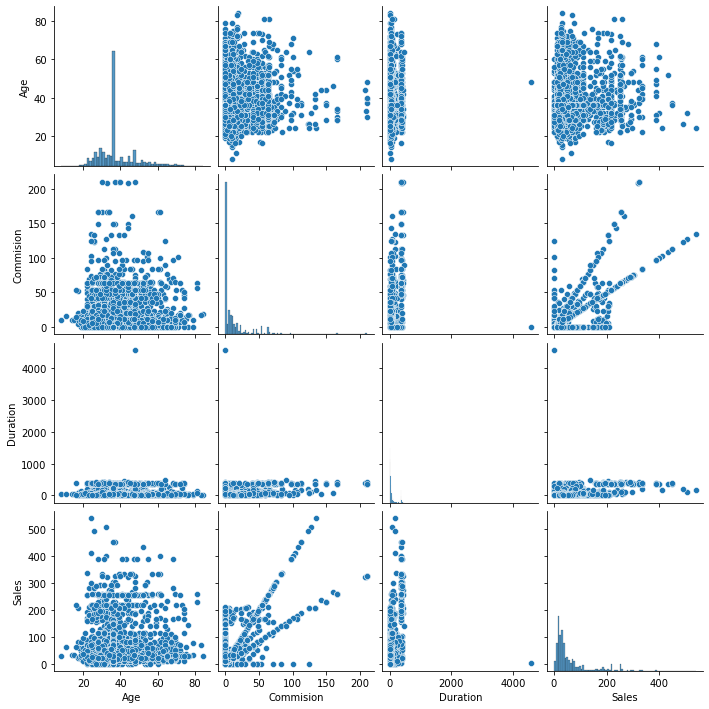

In [251]:
sns.pairplot(df2[['Age', 'Commision', 
    'Duration', 'Sales']])
#only numeric type

### Checking for Correlations

<AxesSubplot:>

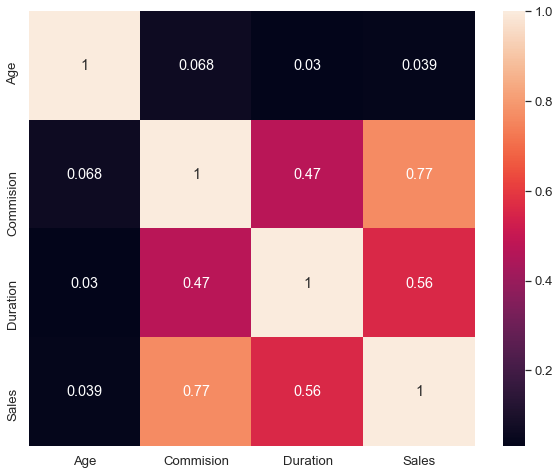

In [252]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df2[['Age', 'Commision', 
    'Duration', 'Sales']].corr(), annot=True)

### Converting all objects to numeric codes

In [253]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [255]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [257]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [260]:
#Frequency of 1's and 0's
df2.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

## Setting up train and test data

In [262]:
x = df2.drop("Claimed", axis=1)

y = df2.pop("Claimed")

x.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


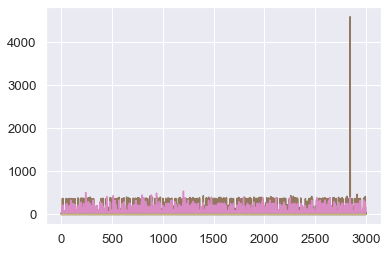

In [266]:
# prior to scaling 
plt.plot(x)
plt.show()

In [351]:
# Scaling the attributes.

from scipy.stats import zscore
x_scaled=x.apply(zscore)
x_scaled.head()

#StandardScalar just has a fixed range

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


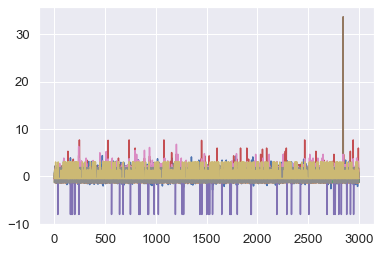

In [269]:
# after scaling 
plt.plot(x_scaled)
plt.show()

In [270]:
x_train, x_test, train_labels, test_labels = train_test_split(x_scaled, y, test_size=.30, random_state=5)

### Checking dimensions of train and test data

In [271]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

x_train (2100, 9)
x_test (900, 9)
train_labels (2100,)
test_labels (900,)


### Building Decision Tree Classifier

In [272]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [275]:
grid_search_dtcl.fit(x_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [276]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [278]:
grid_search_dtcl.fit(x_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

### Regularized the tree using best_estimator_ 

In [303]:
# Generating Tree

train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(x_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

### Variable Importance

In [282]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.596448
Sales         0.207778
Product Name  0.108327
Duration      0.034766
Commision     0.033559
Age           0.019123
Type          0.000000
Channel       0.000000
Destination   0.000000


### Prediction on train and test data

In [283]:
ytrain_predict_dtcl = best_grid_dtcl.predict(x_train)
ytest_predict_dtcl = best_grid_dtcl.predict(x_test)

In [284]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(x_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.720635,0.279365
1,0.979452,0.020548
2,0.914842,0.085158
3,0.552941,0.447059
4,0.914842,0.085158


### Ensemble A Random Forest 

In [285]:
param_grid_rfcl = {
    'max_depth': [4,5,6],#20,30,40
    'max_features': [2,3,4,5],## 7,8,9
    'min_samples_leaf': [8,9,11,15],## 50,100
    'min_samples_split': [46,50,55], ## 60,70
    'n_estimators': [290,350,400] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [288]:
grid_search_rfcl.fit(x_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 46, 'n_estimators': 350}


RandomForestClassifier(max_depth=6, max_features=3, min_samples_leaf=8,
                       min_samples_split=46, n_estimators=350, random_state=1)

### prediction on train and test data

In [289]:
ytrain_predict_rfcl = best_grid_rfcl.predict(x_train)
ytest_predict_rfcl = best_grid_rfcl.predict(x_test)

In [291]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(x_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.778010,0.221990
1,0.971910,0.028090
2,0.904401,0.095599
3,0.651398,0.348602
4,0.868406,0.131594


### Variable Imporatance based on RF

In [292]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.276015
Product Name  0.235583
Sales         0.152733
Commision     0.135997
Duration      0.077475
Type          0.071019
Age           0.039503
Destination   0.008971
Channel       0.002705


### Ensemble an ANN

In [293]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], # 50, 200
    'max_iter': [2500,3000,4000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [295]:
grid_search_nncl.fit(x_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

### Prediction on train and test data

In [297]:
ytrain_predict_nncl = best_grid_nncl.predict(x_train)
ytest_predict_nncl = best_grid_nncl.predict(x_test)

In [298]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(x_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.822676,0.177324
1,0.933407,0.066593
2,0.918772,0.081228
3,0.688933,0.311067
4,0.913425,0.086575


# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

## CART Confusion Matrix and Classification Report for the training data

In [306]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1281,  172],
       [ 257,  390]], dtype=int64)

In [308]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(x_train,train_labels) 
cart_train_acc

0.7957142857142857

In [309]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1453
           1       0.69      0.60      0.65       647

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [310]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.69
cart_train_recall  0.6
cart_train_f1  0.65


## CART -AUC and ROC for the train data

AUC: 0.832


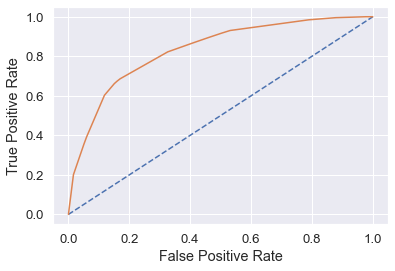

In [349]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

## CART Confusion Matrix and Classification Report for the testing data

In [311]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[540,  83],
       [115, 162]], dtype=int64)

In [312]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(x_test,test_labels)
cart_test_acc

0.78

In [313]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       623
           1       0.66      0.58      0.62       277

    accuracy                           0.78       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.77      0.78      0.78       900



In [314]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.66
cart_test_recall  0.58
cart_test_f1  0.62


## CART -AUC and ROC for the test data

AUC: 0.811


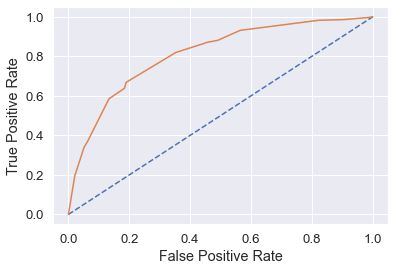

In [350]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

Train Data:
- AUC: 83%
- Accuracy: 79%
- Precision: 69%
- f1-Score: 65%
- Recall: 60%

Test Data:
- AUC: 81%
- Accuracy: 78%
- Precision: 66%
- f1-Score: 62%%
- Recall: 58%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

## RF Model Performance Evaluation on Training data

In [315]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1297,  156],
       [ 255,  392]], dtype=int64)

In [324]:
#train accuracy rf
rf_train_acc=best_grid_rfcl.score(x_train,train_labels) 
rf_train_acc


0.8042857142857143

In [318]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1453
           1       0.72      0.61      0.66       647

    accuracy                           0.80      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



In [319]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.61
rf_train_f1  0.66


Area under Curve is 0.8563713512840778


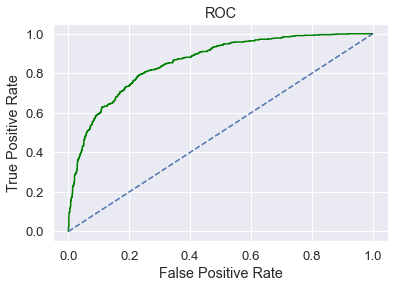

In [322]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(x_train)[:,1])
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [323]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[550,  73],
       [121, 156]], dtype=int64)

In [326]:
#test accuracy rf
rf_test_acc=best_grid_rfcl.score(x_test,test_labels)
rf_test_acc

0.7844444444444445

In [327]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       623
           1       0.68      0.56      0.62       277

    accuracy                           0.78       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.78      0.78      0.78       900



In [328]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.56
rf_test_f1  0.62


Area under Curve is 0.8181994657271499


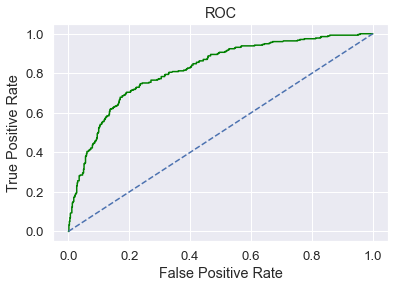

In [329]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(x_test)[:,1])
print('Area under Curve is', rf_test_auc)

Train Data:
- AUC: 86%
- Accuracy: 80%
- Precision: 72%
- f1-Score: 66%
- Recall: 61%

Test Data:
- AUC: 82%
- Accuracy: 78%
- Precision: 68%
- f1-Score: 62%
- Recall: 56%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

## NN Model Performance Evaluation on Training data

In [330]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1298,  155],
       [ 315,  332]], dtype=int64)

In [332]:
#NN accuracy for train data
nn_train_acc=best_grid_nncl.score(x_train,train_labels) 
nn_train_acc

0.7761904761904762

In [333]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [334]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.68
nn_train_recall  0.51
nn_train_f1  0.59


Area under Curve is 0.8166831721609928


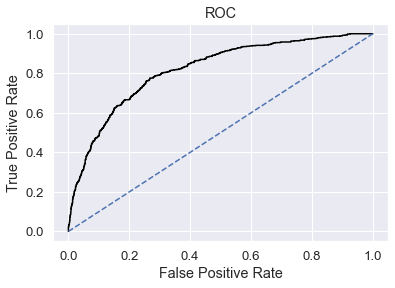

In [335]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(x_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(x_train)[:,1])
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [336]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[553,  70],
       [138, 139]], dtype=int64)

In [338]:
#test accuracy for NN
nn_test_acc=best_grid_nncl.score(x_test,test_labels)
nn_test_acc

0.7688888888888888

In [339]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



In [340]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.5
nn_test_f1  0.57


Area under Curve is 0.8044225275393896


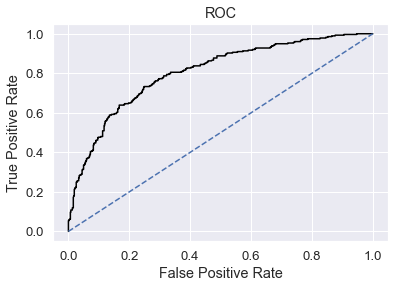

In [341]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(x_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(x_test)[:,1])
print('Area under Curve is', nn_test_auc)

Train Data:
- AUC: 82%
- Accuracy: 78%
- Precision: 68%
- f1-Score: 59%
- Recall: 51%

Test Data:
- AUC: 80%
- Accuracy: 77%
- Precision: 67%
- f1-Score: 57%
- Recall: 50%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

## Comparison of the performance metrics from the 3 models

In [342]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.78,0.80,0.78,0.78,0.77
AUC,0.83,0.81,0.86,0.82,0.82,0.80
Recall,0.60,0.58,0.61,0.56,0.51,0.50
Precision,0.69,0.66,0.72,0.68,0.68,0.67
F1 Score,0.65,0.62,0.66,0.62,0.59,0.57


## ROC Curve for the 3 models on the Training data

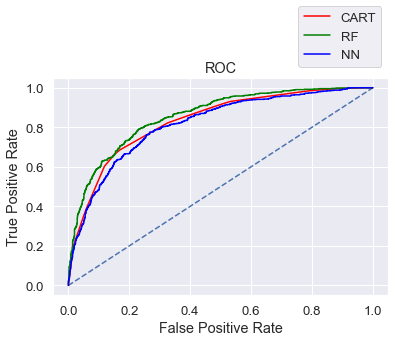

In [345]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='blue',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

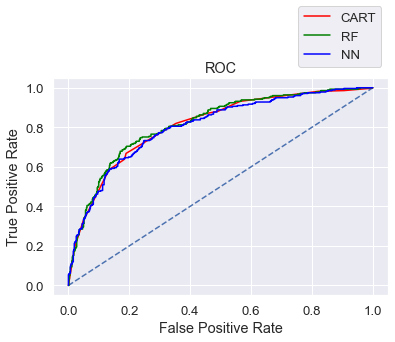

In [346]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='blue',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## CONCLUSION :
I am selecting the RF model, as it has better accuracy, precision, recall and f1-score better than other two CART & NN.

# 2.5 Inference: Basis on these predictions, what are the business insights and recommendations

Looking at the model, more data will help us understand and predict models better.Streamlining online experiences benefited customers, leading to an increase in conversions, which subsequently raised profits. As per the data 90% of insurance is done by online channel.

-  Other interesting fact, is almost all the offline business has a claimed associated

- Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency.

- Also based on the model we are getting 80% accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern.

- Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow.

The Key performance indicator's of insurance claims are:

- Increase customer satisfaction which in fact will give more revenue
- Combat fraud transactions, deploy measures to avoid fraudulent transactions at earliest
- Optimize claims recovery method
- Reduce claim handling costs.